# Gini

## Content-Based Filter

    imports

In [14]:
import numpy as np
import pandas as pd

import requests

from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

import re

from sklearn.metrics.pairwise import cosine_similarity

    read

In [15]:
model_df = pd.read_csv("../data/transformed/processed_content_filter_data.csv")
processed_content_filter_df = pd.read_csv("../data/transformed/processed_content_filter_data.csv")
processed_content_filter_df.head()

,LOAN_ID,DESCRIPTION,LOAN_AMOUNT,LOAN_USE,TAGS,FEMALE_OPERATED,ORIGINAL_LANGUAGE_Arabic,ORIGINAL_LANGUAGE_English,ORIGINAL_LANGUAGE_French,ORIGINAL_LANGUAGE_Indonesian,...,married woman,medical expenses,rancor,sanitary,school fees,single mother,user_favorite,volunteer_like,volunteer_pick,water filter
0,357587,"Ibtisam is a 41-year-old married lady, who kni...",925.0,to buy more wool and make more clothing items.,rancor,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,689681,Nemesiana is a married woman and a mother of t...,125.0,to buy fertilizer and pesticide,rancor,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1589199,Chansamoul’s Group lives in a rural village in...,100.0,to buy a water filter to provide safe drinking...,"#Technology, #Eco-friendly, #Health and Sanita...",0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1471509,"Salim, 30, was orphaned at a young age and los...",575.0,to purchase more timber to sell.,user_favorite,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,423277,Cristina is fifty-one years old and married wi...,400.0,to buy beer and soda for wholesale distribution.,rancor,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
processed_content_filter_df = processed_content_filter_df.drop(
    ["user_favorite", "volunteer_like", "volunteer_pick", "rancor","DESCRIPTION","LOAN_AMOUNT",
     "LOAN_USE", "TAGS", "TAGS+", "TEXT","PROCESSED_TEXT", "LOAN_ID"], axis = 1).astype(np.uint8)

processed_content_filter_df.reset_index(inplace=True, drop=True)

processed_content_filter_df.to_csv("../data/transformed/X_df.csv", index=False)

### Content-based Filter

In [17]:
X = pd.read_csv("../data/transformed/X_df.csv")
X = X.to_numpy()

In [18]:
# pair column number with column name for manual grouping and selection
#[print(f"{i} {j}") for i, j in enumerate(X_df.columns)];

In [19]:
# create a synthetic user
user_interests = np.random.binomial(1, 10/X.shape[1], X.shape[1])
user_interests = np.reshape(user_interests, (1, -1))

In [20]:
# Nearest vectors to synthetic user
rec = cosine_similarity(X, user_interests)

# index similarity scores
ordinals = [i for i in range(len(rec.ravel()))]
rec_ordinal = list(zip(rec.ravel(), ordinals))

# sort for top scores
sorted_index = sorted(rec_ordinal, key = lambda x: x[0], reverse=True)

# top 5 scores and loan ids
top_loan_ids = [(x, model_df.iloc[y][0]) for x, y in sorted_index[0:5]]
top_loan_ids

[(0.3651483716701108, 62784),
 (0.35856858280031806, 1144657),
 (0.33541019662496846, 2231238),
 (0.33541019662496846, 1573919),
 (0.31622776601683794, 322997)]

### Recommendation Output Tests

    Generate Loan Visuals: Brian Rubin and Matthew Ludwig

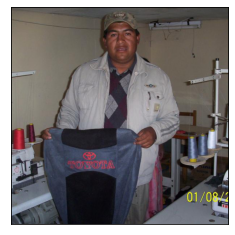

Jaime
Bolivia
{'name': 'Arts'}
Purchase raw materials to make slipcovers.
800.00
...


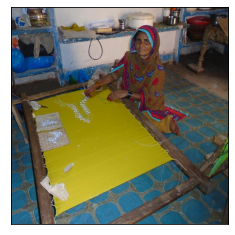

Firdoos
Pakistan
{'name': 'Arts'}
to buy raw materials for her embroidery business.
300.00
Firdoos is a 50-year-old woman, living with her spouse in the area of Multan, Pakistan. She is a mother of two daughters and four sons. Her husband is responsible for fulfilling the needs of the entire family, but Firdoos has also been running an embroidery business for eight years to meet other expenses.  Her native language is Punjabi, which she speaks with her family, but she also speaks Urdu culturally and for her business. They live in a rented room made of brick that has drinking water, el...


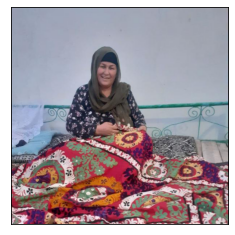

Ulmoma
Tajikistan
{'name': 'Arts'}
to buy colored thread and fabric to expand her sewing and embroidery business.
450.00
Ulmoma is a 56-year-old woman. She is married and the mother of 7 children. Her husband offers services as a route taxi driver. Many of the residents of the region work in agricultural activities, but Ulmoma decided to work with sewing, since she has always admired this activity and the beautify of national dresses.<br /><br />This is why Ulmoma makes national embroidery "popur," which is in great demand. Ulmoma is a professional in her work. Ulmoma wants to expand her daily income and improve h...


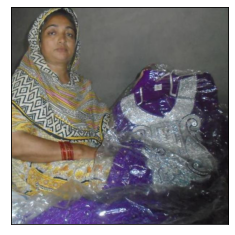

Abida
Pakistan
{'name': 'Arts'}
to buy embroidery raw material such as thread, fancy cloth, sequins, and pearls of various colors in advance, to have in stock for her embroidery business.
350.00
Abida is a 51-year-old lady, living with her spouse in the area of Muzaffargarh, Pakistan.  Abida has been running an embroidery business for ten years to meet household expenses. Her language is Punjabi, which she speaks with her family, but she speaks Urdu culturally and for her business. They live in their own house made of brick that has drinking water, electricity, and plumbing. <br /><br />Her embroidery business is very famous in the area, and that is the reason her business runs well. Du...


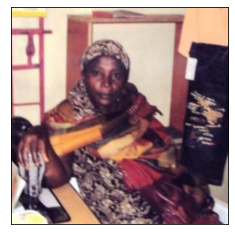

Magdaline
Kenya
{'name': 'Arts'}
To buy fabric and thread.
350.00
For the last 10 years, Magdalene, a 38-year-old businesswoman, has been doing embroidery to meet the needs of her family. She is married and blessed with two school-going children. Previously, she used to sell second hand clothes. She wants in the next five years to be a distributor of embroidery works. She is requesting a loan of 30,000 Kenyan shillings to buy fabric and thread. She is grateful to Faulu Kenya for teaching her the art of saving....


In [21]:
for i in range(5):
    loan_id = top_loan_ids[i][1]
    base_url = 'https://api.kivaws.org/graphql?query='
    graphql_query = '{lend {loan (id: %s){id name gender image {id url} description use geocode{country{name}} loanAmount sector{name}}}}'   %loan_id

    r = requests.post(base_url + graphql_query)
    r = r.json()
    url = r['data']['lend']['loan']['image']['url']
    url_600 = re.sub("s100", "s600", url)
    response = requests.get(url_600)
    
    img = Image.open(BytesIO(response.content))
    img.resize((500,500), Image.ANTIALIAS)
    
    #removing ticks from x/y axis : https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    
    plt.imshow(img)
    plt.show()
    
    print(r["data"]["lend"]["loan"]["name"])
    print(r["data"]["lend"]["loan"]["geocode"]["country"]["name"])
    print(r["data"]["lend"]["loan"]["sector"])
    print(r["data"]["lend"]["loan"]["use"])
    print(r["data"]["lend"]["loan"]["loanAmount"])
    print(re.sub("\\r|\\n|\\t|---", "", r["data"]["lend"]["loan"]["description"])[0:500] + "...")

    Experiment to output relevant information from recommended LOAN_IDs: Brian Rubin

In [31]:
df = pd.read_csv("../data/raw/loans.csv", nrows = 10000)

In [32]:
def kiva_output(loan_1, loan_2, loan_3):
    #return details from loans_df on each loan : Name, Gender, Loan Amount, Activity/Sector Name, Description, Country
    x = df.query(f"LOAN_ID == {loan_1}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    y = df.query(f"LOAN_ID == {loan_2}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    z = df.query(f"LOAN_ID == {loan_3}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    #combine all loan details into one dataframe 
    final = pd.concat([x, y, z])
    return final

In [33]:
df["LOAN_ID"][0:3]

0    1737446
1    1274681
2    1552694
Name: LOAN_ID, dtype: int64

In [34]:
kiva_output(1737446, 1274681, 1552694)

,LOAN_NAME,BORROWER_GENDERS,LOAN_AMOUNT,ACTIVITY_NAME,SECTOR_NAME,DESCRIPTION,COUNTRY_NAME
0,Emelisa,female,125.0,General Store,Retail,Emelisa is 32 years old. With two children in...,Philippines
1,Samol,female,1000.0,Personal Housing Expenses,Housing,Samol is married and she lives with her husban...,Cambodia
2,ABLA,female,200.0,Food Production/Sales,Food,Abla est une femme célibataire qui habite à Ag...,Togo
